<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Visualizing-Solutions-to-Partial-Differential-Equations" data-toc-modified-id="Visualizing-Solutions-to-Partial-Differential-Equations-1">Visualizing Solutions to Partial Differential Equations</a></span><ul class="toc-item"><li><span><a href="#Solving-The-Heat-Equation-(Laplace's-Equation)-with-Python" data-toc-modified-id="Solving-The-Heat-Equation-(Laplace's-Equation)-with-Python-1.1">Solving The Heat Equation (Laplace's Equation) with Python</a></span><ul class="toc-item"><li><span><a href="#Simplification-and-Spatial-Discretization-of-The-Steady-State-Heat-Equation-in-2D-and-3D-cartesian-coordinates." data-toc-modified-id="Simplification-and-Spatial-Discretization-of-The-Steady-State-Heat-Equation-in-2D-and-3D-cartesian-coordinates.-1.1.1">Simplification and Spatial Discretization of The Steady State Heat Equation in 2D and 3D cartesian coordinates.</a></span><ul class="toc-item"><li><span><a href="#Relaxation-Method" data-toc-modified-id="Relaxation-Method-1.1.1.1">Relaxation Method</a></span></li></ul></li><li><span><a href="#Visualizing-The-Solution" data-toc-modified-id="Visualizing-The-Solution-1.1.2">Visualizing The Solution</a></span><ul class="toc-item"><li><span><a href="#Plotting-function" data-toc-modified-id="Plotting-function-1.1.2.1">Plotting function</a></span></li><li><span><a href="#Python-and-Numpy" data-toc-modified-id="Python-and-Numpy-1.1.2.2">Python and Numpy</a></span></li><li><span><a href="#Cython-and-Numpy" data-toc-modified-id="Cython-and-Numpy-1.1.2.3">Cython and Numpy</a></span></li><li><span><a href="#Just-In-Time-Compiling-(winner)" data-toc-modified-id="Just-In-Time-Compiling-(winner)-1.1.2.4">Just-In-Time Compiling (winner)</a></span></li><li><span><a href="#Typed-JIT" data-toc-modified-id="Typed-JIT-1.1.2.5">Typed JIT</a></span></li></ul></li></ul></li><li><span><a href="#Solving-the-Heat-Flow-(Schroedinger)-Equation" data-toc-modified-id="Solving-the-Heat-Flow-(Schroedinger)-Equation-1.2">Solving the Heat Flow (Schroedinger) Equation</a></span><ul class="toc-item"><li><span><a href="#Rethinking-code-for-Laplace's-Equation" data-toc-modified-id="Rethinking-code-for-Laplace's-Equation-1.2.1">Rethinking code for Laplace's Equation</a></span><ul class="toc-item"><li><span><a href="#Python-and-NumPy" data-toc-modified-id="Python-and-NumPy-1.2.1.1">Python and NumPy</a></span></li><li><span><a href="#JIT" data-toc-modified-id="JIT-1.2.1.2">JIT</a></span></li></ul></li><li><span><a href="#Warm-Handprint-on-Surface-(Cool!)" data-toc-modified-id="Warm-Handprint-on-Surface-(Cool!)-1.2.2">Warm Handprint on Surface (Cool!)</a></span></li></ul></li></ul></li></ul></div>

I used these __Additional Resources:__
1. Computational Physics with Python by Dr. Eric Ayars of California State University, Chico. <a href="http://www.fizika.unios.hr/rf/wp-content/uploads/sites/67/2011/02/CPwP.pdf">Available for download (PDF) here</a>.
2. <a href="https://www.codeproject.com/articles/1087025/%2fArticles%2f1087025%2fUsing-Python-to-Solve-Computational-Physics-Proble">Using Python to Solve Computational Physics Problems</a> by Garbel Nervadof on Code Project. __*Note that Code Project author incorrectly coded the boundary conditions. I've fixed the error, as demonstrated by my code below*__

I read but *did not* use code/math from these __Additional Resources:__

3. <a href="https://fenicsproject.org/pub/tutorial/html/._ftut1001.html#table_of_contents">Fenics Project: Solving PDEs with Python</a>

4. <a href="https://hinderedsettling.com/2015/02/06/exploring-the-diffusion-equation-with-python/">Exploring the Diffusion Equation with Python</a>

5. <a href="http://www.math-cs.gordon.edu/courses/mat342/python.html">Gordon College of Mathematics and Science: Python for Computation Mathematics and Physics Demos and Projects</a>

6. <a href="https://nbviewer.jupyter.org/github/barbagroup/CFDPython/tree/master/lessons/">Dr. Lorena A. Barbara's 12-Step Crash Course in Python for Fluid Dynamics</a>

# Visualizing Solutions to Partial Differential Equations

__Goals:__

1) Use Python and simulations to visualize solutions to some physical situations that are modeled by partial differential equations, then optimize these simulations using Cython, JIT compiling, and other tools at our disposal.

## Solving The Heat Equation (Laplace's Equation) with Python

Laplace's Equation for heat conduction can be given in 3D as follows:

$$ \frac{\partial{^2T}}{\partial{x^2}} + \frac{\partial{^2T}}{\partial{y^2}} + \frac{\partial{^2T}}{\partial{z^2}} = 0$$

We only have to solve the heat equation for idealized plates in two dimensions. We'll represent Laplace's Equation in three dimensions, and easily adapt the method to two dimensions.<br /><br />


To do this with *Python* we'll have to break space into a grid of evenly spaced discrete points. We'll develop a simplified expression of Laplace's Equation and use it to solve for the potential $T$. Very quickly in the discretization process we'll find out something very exciting: the value of $T$ at a given point in the grid is the average of all its neighboring points.<br /><br />


We'll only have to write and algorithm that passes over our grid until the change in value of a point is below our pre-determined tolerance... since we'll be working with very simple systems we can just set the number of passes to a sufficiently high value without having to worry about computation time or precision.

### Simplification and Spatial Discretization of The Steady State Heat Equation in 2D and 3D cartesian coordinates.

See <a href="http://www.fizika.unios.hr/rf/wp-content/uploads/sites/67/2011/02/CPwP.pdf">Computational Physics with Python by Dr. Eric Ayars of California State University,</a> beginning at page 141.

We can write the first derivative of $T$ with respect to $x$ at $x = x_{i+\frac{1}{2}}$ as the approximation:

$$\frac{\partial{T}}{\partial{x}} \approx \frac{T(x_{i+1}) - T(x_{i-1})}{\Delta x}$$

We simplify our notation such that
$$T(x_i) = T_i$$ 
$$T(x_{i+1},y_{j},z_{k}) = T_{i+1,j,k}$$
$$T(x_{i},y_{j},z_{k}) = T_{ijk}$$

Similarly we can write

$$\frac{\partial{T_{i-\frac{1}{2}}}}{\partial{x}} \approx \frac{T_{i} - T_{i-1}}{\Delta x}$$

We need to find each $T_i$, so:

$$\frac{\partial{T_i}}{\partial{x}} \approx \frac{T(x_{i+\frac{1}{2}}) - T(x_{i-\frac{1}{2}})}{\Delta x}$$

We've been working with first derivatives. What we really need is the *second* derivative:

$$\frac{\partial{^2T_i}}{\partial{x^2}} \approx \frac{T(x_{i+\frac{1}{2}}) - T(x_{i-\frac{1}{2}})}{\Delta x^2}$$

Now we plug this back into Laplace's Equation and simplify. There will appear to be a bit of a jump to the expression for $T_{ijk}$ that's given next, but it works out very simply on paper:

$$T_{ijk} = \frac{1}{6}[T_{i+1,j,k}+T_{i-1,j,k}+T_{i,+1j,k}+T_{i,j-1,k}+T_{i,j,k+1}+T_{i,j,k-1}]$$

As it turns out, what this tells us is that on a grid of evenly spaced discrete points, the temperature at a given point is equal to the average of the temperature of all the points around it. Cool!

In two dimensions it is even more simple and works out to be:

$$T_{ij} = \frac{1}{4}[T_{i+1,j,}+T_{i-1,j,}+T_{i,+1j,}+T_{i,j-1,}]$$

Once you work this out on paper, head over to <a href="https://www.codeproject.com/articles/1087025/%2fArticles%2f1087025%2fUsing-Python-to-Solve-Computational-Physics-Proble">this Code Project article</a> and look at the illustrations and the code. It will make even more sense.

#### Relaxation Method

The *relaxation method* entails giving a guess as to average value of the temperature over the whole plate. It can start at zero, but even the roughest guess will speed up calculation if its closer than zero to the average value across the plate. This won't effect the end result, just the calculation time.

### Visualizing The Solution

Consider a plate with dimensions $10cm \times 20cm$.

The Temperature on the bottom and top sides of the plate is held at 100 degrees, and zero on the left and right sides.

For our relaxation we'll choose a starting guess of 20 degrees.

#### Plotting function

This can be resued for any rectangular plate in 2 dimensions.

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from jupyterthemes import jtplot
jtplot.style()
%matplotlib inline
#from numba import jit

#@jit
def plot_heatflow(T,     # matrix contianing converged heatflow values
                  lenx,  # width of plate
                  leny): # length of plate
    
    # discrete grid for plotting the solution
    if lenx < leny:
        X, Y = np.mgrid[0:lenx:10j, 0:leny:(leny/lenx)*10j]
    else:
        X, Y = np.mgrid[0:lenx:(lenx/leny)*10j, 0:leny:10j]
    
    
    # Set the color interpolation and color map
    # Color interpolation sets the number of regions of color... try changing it to see.
    # 10 gives a color map with many tide lines, 250 gives a smooth, expensive map
    colorinterpolation = 250
    colorMap = plt.cm.inferno

    # Draw a contour plot
    fig = plt.figure(figsize=[16, 6])
    ax0 = fig.add_subplot(121)
    ax0.grid(False)
    ax0.set_title("Map of Heat Flow")
    plt.contourf(X, Y, T, colorinterpolation, cmap=colorMap)
    plt.colorbar()


    # Draw a 3D plot
    from mpl_toolkits.mplot3d import Axes3D
    ax1 = fig.add_subplot(122, projection='3d')
    ax1.plot_surface(X=X, Y=Y, Z=T, cmap=colorMap)
    ax1.set_title("3D-Projection: Z = Temperature")

#### Python and Numpy

In [1]:
# use Numpy because it works nicely with Cython, no need to convert lists/arrays
import numpy as np

def heatflow_py(lenx=10, # width of the plate
              leny=10, # length of the plate
              delta=1, # delta = dx = dy
              # set the boundary conditions (temperature)
              boundary_conds = [100, 0, 0, 0], # [top, bottom, left, right]
              relaxation_guess = 0, # initial guess at interior temp of plate
              maxiter = 500, # a number of iterations within which we assume convergence to occur
             ):

    # Set the Temperature matrix
    # and set the interior value our guess value
    T = np.empty((lenx, leny))
    T.fill(relaxation_guess)

    # Set boundary conditions in our Temperature matrix
    T[:, (leny-1):] = boundary_conds[0]
    T[:, :1] = boundary_conds[1]
    T[:1, :] = boundary_conds[2]
    T[(lenx-1):, :] = boundary_conds[3]

    for iteration in range(0, maxiter):
        for i in range(1, lenx-1, delta):
            for j in range(1, leny-1, delta):
                T[i, j] = 0.25 * (T[i+1][j] + T[i-1][j] + T[i][j+1] + T[i][j-1])
    
    return T
    
    
%timeit heatflow_py(lenx = 10, leny = 20, boundary_conds = [100, 100, 0, 0])

236 ms ± 11.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


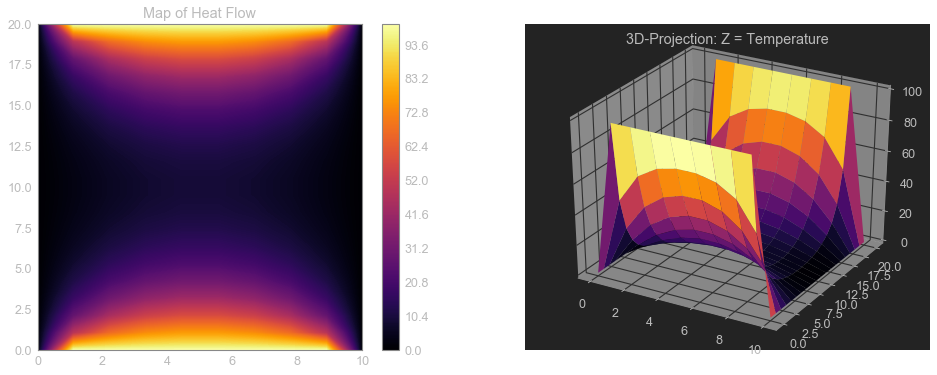

In [3]:
plot_heatflow(heatflow_py(10,20,boundary_conds = [100, 100, 0, 0]), 10, 20)

#### Cython and Numpy

In [2]:
%load_ext Cython

In [6]:
%%cython

# use Numpy because it works nicely with Cython, no need to convert lists/arrays
import numpy as np
# special compile-time info about Numpy
cimport numpy as np

# fix a datatype for our array
DTYPE_int = np.int
DTYPE_float = np.float64

# `ctypedef` assigns a corresponding compile-time type. for every type in the
# numpy module there is a corresponding _t type for compile time
ctypedef np.int_t DTYPE_int_t
ctypedef np.float64_t DTYPE_float_t

def heatflow_cy(lenx_=10, # width of the plate
              leny_=10, # length of the plate
              delta_=1, # delta = dx = dy
              # set the boundary conditions (temperature)
              np.ndarray boundary_conds_ = np.array([100, 0, 0, 0], dtype=DTYPE_float), # [top, bottom, left, right]
              relaxation_guess_ = 0, # initial guess at interior temp of plate
              maxiter_ = 500, # a number of iterations within which we assume convergence to occur
             ):
    
    cdef int lenx=lenx_
    cdef int leny=leny_
    cdef int delta=delta_
    cdef np.ndarray boundary_conds = boundary_conds_
    cdef float relaxation_guess = relaxation_guess_
    cdef int maxiter = maxiter_
    
    # Set the Temperature matrix
    # and set the interior value our guess value
    cdef np.ndarray[DTYPE_float_t, ndim=2] T = np.empty((lenx, leny), dtype=DTYPE_float)
    T.fill(relaxation_guess)

    # Set boundary conditions in our Temperature matrix
    T[:, (leny-1):] = boundary_conds[0]
    T[:, :1] = boundary_conds[1]
    T[:1, :] = boundary_conds[2]
    T[(lenx-1):, :] = boundary_conds[3]
    
    
    for iteration in range(0, maxiter):
        for i in range(1, lenx-1, delta):
            for j in range(1, leny-1, delta):
                T[i, j] = 0.25 * (T[i+1][j] + T[i-1][j] + T[i][j+1] + T[i][j-1])
    
    return T

283 ms ± 23.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


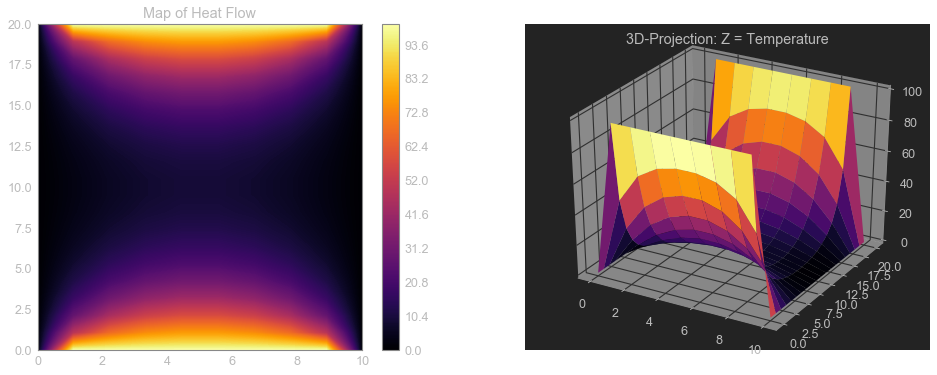

In [7]:
%timeit heatflow_cy(lenx_ = 10, leny_ = 20, boundary_conds_ = np.asarray([100, 100, 0, 0]))

plot_heatflow(heatflow_cy(lenx_ = 10, leny_ = 20, boundary_conds_ = np.asarray([100, 100, 0, 0])), 10, 20)

#### Just-In-Time Compiling (winner)

In [15]:
# use Numpy because it works nicely with Cython, no need to convert lists/arrays
import numpy as np
from numba import jit

@jit
def heatflow_py_jit0(lenx=10, # width of the plate
              leny=10, # length of the plate
              delta=1, # delta = dx = dy
              # set the boundary conditions (temperature)
              boundary_conds = [100, 0, 0, 0], # [top, bottom, left, right]
              relaxation_guess = 0, # initial guess at interior temp of plate
              maxiter = 500, # a number of iterations within which we assume convergence to occur
             ):

    # Set the Temperature matrix
    # and set the interior value our guess value
    T = np.empty((lenx, leny))
    T.fill(relaxation_guess)

    # Set boundary conditions in our Temperature matrix
    T[:, (leny-1):] = boundary_conds[0]
    T[:, :1] = boundary_conds[1]
    T[:1, :] = boundary_conds[2]
    T[(lenx-1):, :] = boundary_conds[3]

    for iteration in range(0, maxiter):
        for i in range(1, lenx-1, delta):
            for j in range(1, leny-1, delta):
                T[i, j] = 0.25 * (T[i+1][j] + T[i-1][j] + T[i][j+1] + T[i][j-1])
    
    return T
    
    

In [21]:
%timeit -r7 -n1000 heatflow_py_jit0(lenx = 10, leny = 20, boundary_conds = [100.0, 100.0, 0.0, 0.0])

500 µs ± 51.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


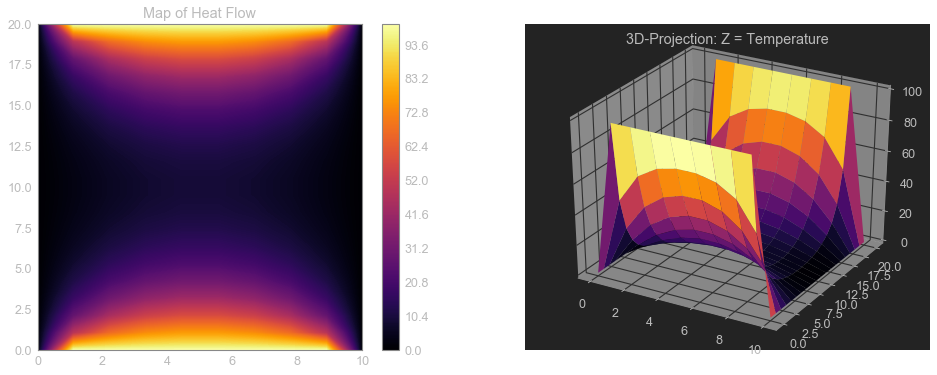

In [16]:
plot_heatflow(heatflow_py_jit(10,20,boundary_conds = [100, 100, 0, 0]), 10, 20)

#### Typed JIT

In [206]:
# use Numpy because it works nicely with Cython, no need to convert lists/arrays
import numpy as np
from numba import jit

In [202]:
a, b = 10, 10
relaxation_guess=0.0
T = np.repeat(relaxation_guess, a*b).reshape((a, b))

@jit(nopython=True, fastmath=True)
def heatflow_py_jit1(relaxation_matrix, # initial guess at interior temp of plate
              # set the boundary conditions (temperature)
              boundary_conds = [100.0, 0.0, 0.0, 0.0], # [top, bottom, left, right]
              delta=1, # delta = dx = dy
              maxiter = 500, # a number of iterations within which we assume convergence to occur
             ):


    # Set the Temperature matrix
    # and set the interior value our guess value
    T = relaxation_matrix.copy()
    
    lenx = T.shape[0] #width of plate
    leny = T.shape[1] #height of plate

    # Set boundary conditions in our Temperature matrix
    T[:, (leny-1):] = boundary_conds[0]
    T[:, :1] = boundary_conds[1]
    T[:1, :] = boundary_conds[2]
    T[(lenx-1):, :] = boundary_conds[3]

    for iteration in range(0, maxiter):
        for i in range(1, lenx-1, delta):
            for j in range(1, leny-1, delta):
                T[i, j] = 0.25 * (T[i+1][j] + T[i-1][j] + T[i][j+1] + T[i][j-1])
    
    return T



In [205]:
%timeit -r7 -n1000  heatflow_py_jit1(relaxation_matrix=T, boundary_conds = [100.0, 100.0, 0.0, 0.0])

197 µs ± 18.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Solving the Heat Flow (Schroedinger) Equation

https://scipython.com/book/chapter-7-matplotlib/examples/the-two-dimensional-diffusion-equation/

https://github.com/zsylvester/notebooks/blob/master/diffusion_equation.ipynb

https://hinderedsettling.com/2015/02/06/exploring-the-diffusion-equation-with-python/

The Heat Flow Equation is given

$$\nabla^2u = \alpha^{-2}\frac{\partial u}{\partial t}$$

Which can be equivalently expressed as 

$$ \alpha^2(\frac{\partial{^2u}}{\partial{x^2}} + \frac{\partial{^2u}}{\partial{y^2}} + \frac{\partial{^2u}}{\partial{z^2}}) - \frac{\partial u}{\partial t} = 0$$

where $u$ is the temperature at time $t$ at a given point in space.


Using the same method that we used for Laplace's Heat Equation, we'll apply a discrete approximation using finite differences.

We simplify our notation such that
$$u(x_i, t^n) = u^n_i$$ 
$$u(x_{i+1},y_{j},z_{k}, t^n) = u^n_{i+1,j,k}$$
$$u(x_{i},y_{j},z_{k}, t^{n+1}) = u^{n+1}_{ijk}$$

Note that $n$ is not an exponent, but represents the $n$th time step.

Working in just one spatial dimension to start, we can write the first derivative of $u$ with respect to $x$ at $x = x_{i+\frac{1}{2}}$ and timestep $t^n$ as the approximation:

$$\frac{\partial{^2u^n}}{\partial{x^2}} \approx \frac{u^n(x_{i+1}) - u^n(x_{i-1})}{\Delta x^2}$$

Similarly we can write

$$\frac{\partial{^2u^n_{i-\frac{1}{2}}}}{\partial{x^2}} \approx \frac{u^n_{i} - u^n_{i-1}}{\Delta x^2}$$

We need to find each $u^n_i$, so:

$$\frac{\partial{^2u^n_i}}{\partial{x^2}} \approx \frac{u^n(x_{i+\frac{1}{2}}) - u^n(x_{i-\frac{1}{2}})}{\Delta x^2} = \frac{u^n_{i+1} + u^n_{i-1} - 2u^n_i}{\Delta x^2}$$

Now we extend this to three dimensions, just as we did with Laplace's heat equation, and plug back into The Heat Flow Equation:

$$\alpha^2(\frac{u^n_{i+1,j,k} + u^n_{i-1,j,k} - 2u^n_{i,j,k}}{\Delta x^2} + \frac{u^n_{i,j+1,k} + u^n_{i,j-1,k} - 2u^n_{i,j,k}}{\Delta y^2} + \frac{u^n_{i,j,k+1} + u^n_{i,j,k-1} - 2u^n_{i,j,k}}{\Delta z^2}) = \frac{\partial{u}}{\partial{t}}$$

Similarly, we need to consider the time-dependent term of the Heat Flow Equation:

$$\frac{\partial{u}}{\partial{t}}$$

We are interested in finding the temperature at a given point in space, one timestep after $t^n$. This means we want to find $u^{n+1}_{i,j,k}$, which happens at time $t^{n+1}$

Applying the finite differences method here, we have

$$\frac{\partial{u}}{\partial{t}} \approx \frac{u^{n+1}_{i,j,k} - u^{n}_{i,j,k}}{\Delta t}$$

Next, we plug this into the Schroedinger Equation (Heat Flow Equation) and solve for our golden nugget, $u^{n+1}_{i,j,k}$

What we get is a very long equation:

$${u^{n+1}_{i,j,k}} = \alpha^2{\Delta t}(\frac{u^n_{i+1,j,k} + u^n_{i-1,j,k} - 2u^n_{i,j,k}}{\Delta x^2} + \frac{u^n_{i,j+1,k} + u^n_{i,j-1,k} - 2u^n_{i,j,k}}{\Delta y^2} + \frac{u^n_{i,j,k+1} + u^n_{i,j,k-1} - 2u^n_{i,j,k}}{\Delta z^2}) + u^{n}_{i,j,k}$$

This will easily scale down to two dimensions when we do this with code.

In the code below, each iteration of `do_timestep` updates the temperature array `u` from the results of the previous timestep `u0`.

 We could implement nested loops just like we did for the heat equation code, as this would be simplest.

In [ ]:
# If we wanted to do nested loops, it would look like this
for i in range(1, nx-1):
    for j in range(1, ny-1):
        uxx = (u0[i+1,j] - 2*u0[i,j] + u0[i-1,j]) / dx2
        uyy = (u0[i,j+1] - 2*u0[i,j] + u0[i,j-1]) / dy2
        u[i,j] = u0[i,j] + dt * D * (uxx + uyy)

Instead of nested loops, we'll vectorize the whole operation using NumPy arrays.

### Rethinking code for Laplace's Equation

We want to be able to produce a time-domain dependent model of diffusion, such that it has come to a particular steady state prior to diffusion. To do so we will rethink our code from the heat equation to make it better and more versatile. In particular, what we want to change is the dependency on equal step sizes in each cartesian direction. Then we'll write code to solve for heat flow after $t=0$

__Imperfection__: One particular problem with this simlation is that there is no way for heat to escape the system, so eventually th time-series will converge to another steady state, a global average across the plate.

#### Python and NumPy

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
import numpy as np
jtplot.style()
%matplotlib inline

class hotplate:
    def __init__(self,
                    # Set dimensions of our plate
                    w = 10,
                    h = 20,
                    # D = Thermal Diffusivity 
                    # note that this is the same as alpha^2 from the heat flow equation.
                    D = 4,  # Approx. thermal diffusivity of stainless steel, (mm^2/s)
                ):
        self.w = w
        self.h = h
        self.D = D

    def steadystate(self,
                    # Boundary conditions: [top, bottom, left, right]
                    boundary_conds = [100,100,0,0],
                    # set the cartesian area elements
                    ds = 0.1,
                    # Relaxation Method: Initial guess of interior temp
                    # This is for finding the initial steady state
                    Tguess = 20,
                    # number of iterations within which we assume the steady state to converge
                    maxiter = 500,
                    # Set the color interpolation and color map
                    # Color interpolation sets the number of regions of color... try changing it to see.
                    # 10 gives a color map with many tide lines, 250 gives a smooth, expensive map
                    colorinterpolation = 250,
                    colorMap = plt.cm.inferno,
                    graphit=True
                    ):


        # SEE: second derivatives of spatially-dependent terms
        self.dx, self.dy = ds, ds
        self.dx2, self.dy2 = (self.dx*self.dx), (self.dy*self.dy)
        self.dt = self.dx2*self.dy2 / (2 * self.D * (self.dx2 + self.dy2))

        # number of discrete points in each cardinal direction
        self.nx, self.ny = int(self.w/self.dx), int(self.h/self.dy)

        # Initialize the array we'll do calculations on
        # and set the interior value to Tguess
        self.u0 = np.empty((self.nx, self.ny))
        self.u0.fill(Tguess)

        # Bountary conditions
        Ttop = boundary_conds[0]
        Tbottom = boundary_conds[1]
        Tleft = boundary_conds[-2]
        Tright = boundary_conds[-1]

        # Set boundary conditions for the steady state before t=0
        self.u0[:, (self.ny-1):] = Ttop
        self.u0[:, :1] = Tbottom
        self.u0[:1, :] = Tleft
        self.u0[(self.nx-1):, :] = Tright


        # Compute the steady state distribution, where u0 = Steady-State Temperature Matrix
        for iteration in range(0, maxiter):
            for i in range(1, self.nx-1):
                for j in range(1, self.ny-1):
                    self.u0[i, j] = (0.25) * (self.u0[i+1][j] + self.u0[i-1][j] +
                                        self.u0[i][j+1] + self.u0[i][j-1])


        # Create en empty array for passing values during timestep computations
        self.u = np.empty((self.nx, self.ny))


        if graphit==True:
            # PLOT IT:
            # discrete grid for plotting the solution
            X, Y = np.mgrid[0:self.w:self.nx*1j, 0:self.h:self.ny*1j]

            # Draw a contour plot
            fig = plt.figure(figsize=[16, 6])
            ax0 = fig.add_subplot(121)
            ax0.grid(False)
            ax0.set_title("Map of Steady State")
            plt.contourf(X, Y, self.u0, colorinterpolation, cmap=colorMap)
            plt.colorbar()

            # Draw a 3D plot
            from mpl_toolkits.mplot3d import Axes3D
            ax1 = fig.add_subplot(122, projection='3d')
            ax1.plot_surface(X=X, Y=Y, Z=self.u0, cmap=colorMap)
            ax1.set_title("Steady State 3D-Projection: Z = Temperature")

            plt.show()


    def hotboundaries(self,
                      boundary_conds=[0,0,0,0]):

        # New initial conditions
        Ttop_new = boundary_conds[0]
        Tbottom_new = boundary_conds[1]
        Tleft_new = boundary_conds[-2]
        Tright_new = boundary_conds[-1]

        # Set new boundary conditions in the steady-state matrix
        self.u0[:, :5] = Tbottom_new
        self.u0[(self.nx-5):, :] = Tright_new
        self.u0[:5, :] = Tleft_new
        self.u0[:, (self.ny-5):] = Ttop_new


    # produce a hot spot on the plate and observe thermal diffusion
    def hotspot(self,
                # New initial conditions version 2 - ring of inner radius r, width dr centred at (cx,cy) (mm)
                Tspot = 200, # temperature of spot
                r = 1, # radius of circle
                c = (0, 0) # position of center of circle on plate
                ):

        r2 = r*r
        for i in range(self.nx):
            for j in range(self.ny):
                p2 = (i * self.dx - c[0])**2 + (j * self.dy - c[1])**2
                if p2 < r2:
                    self.u0[i, j] = Tspot


    def do_timestep(self):
        # Propagate with forward-difference in time, central-difference in space
        self.u[1:-1, 1:-1] = self.u0[1:-1, 1:-1] + self.D * self.dt * (
            (self.u0[2:, 1:-1] - 2*self.u0[1:-1, 1:-1] + self.u0[:-2, 1:-1])/self.dx2
            + (self.u0[1:-1, 2:] - 2*self.u0[1:-1, 1:-1] + self.u0[1:-1, :-2])/self.dy2)
        
        self.u0 = self.u


    def heatflow(self,

                # Set the number of time steps
                tsteps = 1001,

                # Output figures at these timesteps
                tfigs = [0, 4, 25, 50, 100, 250, 500, 1000],

                # Set the color interpolation and color map
                # Color interpolation sets the number of regions of color... try changing it to see.
                # 10 gives a color map with many tide lines, 250 gives a smooth, but computationally expensive map
                colorinterpolation = 250,
                colorMap = plt.cm.inferno,
                graphit=True
                ):

        # Set a grid of discrete points over which to plot the Temperature matrix
        X, Y = np.mgrid[0:self.w:self.nx*1j, 0:self.h:self.ny*1j]

        # Will act as an index for generating figures at specified timesteps
        fignum = 0 # initialize at 0

        # Initialize matplotlib figure
        fig = plt.figure(figsize=[12, 15])
        fig.suptitle('Heat Flow Visualized', fontsize=35)

        if graphit==True:
            # Run time series and draw heat flow snapshots
            for n in range(tsteps):
                self.do_timestep()
                if n in tfigs:
                    fignum += 1
                    ax = fig.add_subplot(420 + fignum)
                    #im = ax.imshow(u.copy(), cmap=colorMap)
                    im = ax.contourf(X, Y, self.u, colorinterpolation, cmap=colorMap)
                    ax.set_title('timestep: {}'.format(n))

            fig.subplots_adjust(right=0.85)
            cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
            cbar_ax.set_xlabel('Temp Scale', labelpad=20)
            fig.colorbar(im, cax=cbar_ax)
            plt.show()
        else:
            for n in range(tsteps):
                self.do_timestep()
            

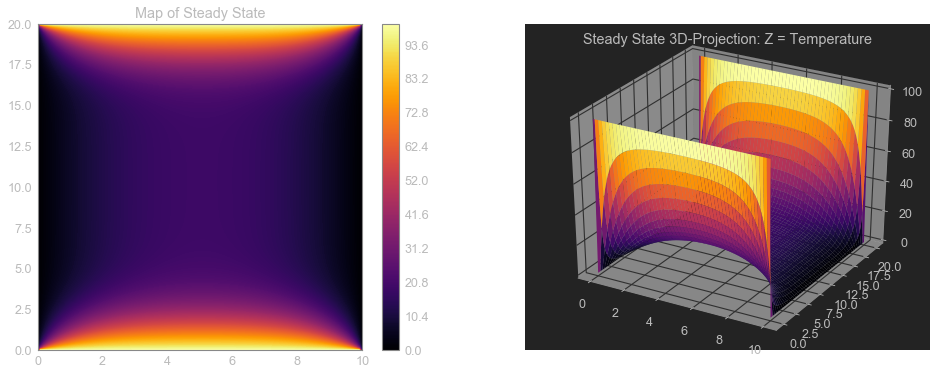

In [2]:
a = hotplate()

a.steadystate()

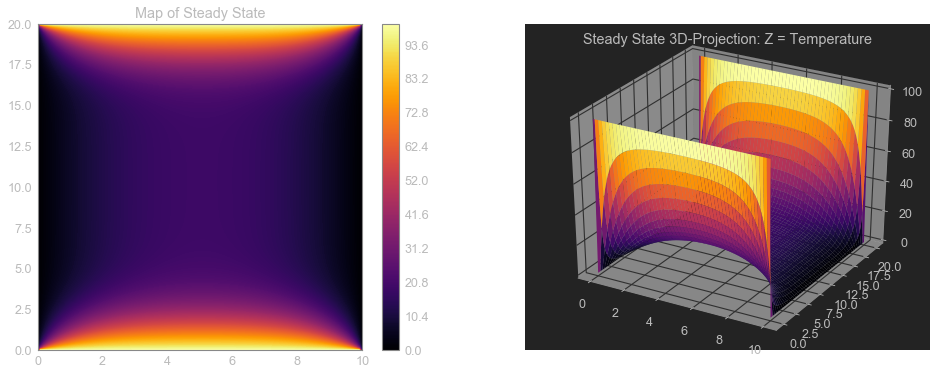

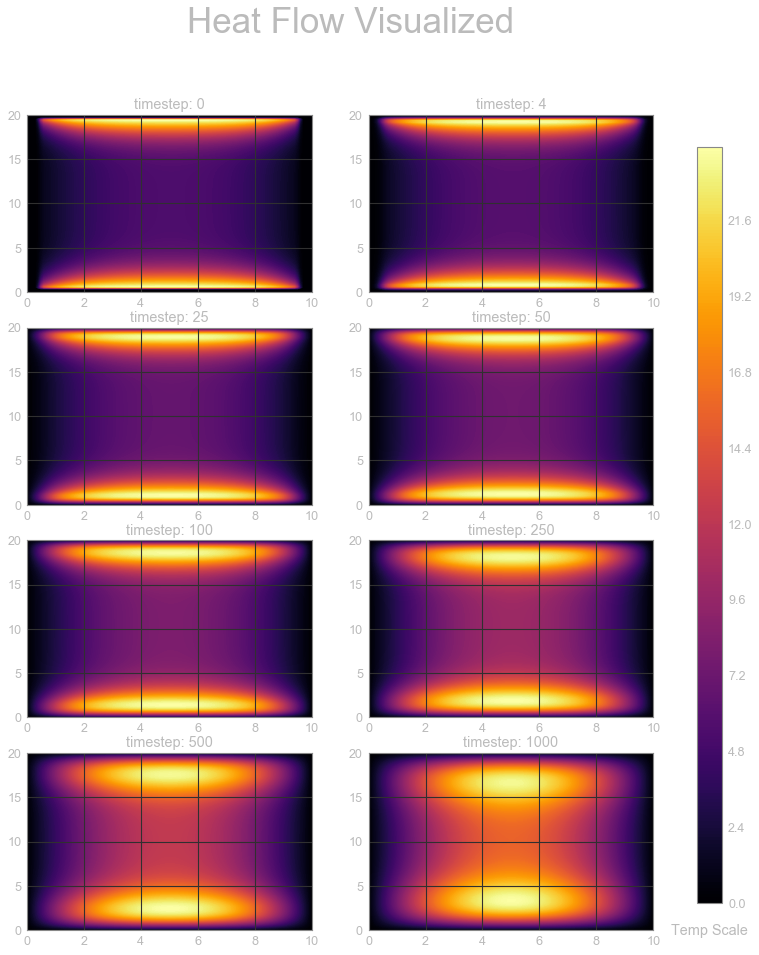

In [78]:
a.hotboundaries()

#a.hotspot(c=(5,10), Tspot=100)

a.heatflow()

#### JIT

In [207]:
from numba import jit, jitclass

In [208]:
help(jitclass)

Help on function jitclass in module numba.jitclass.decorators:

jitclass(spec)
    A decorator for creating a jitclass.
    
    **arguments**:
    
    - spec:
        Specifies the types of each field on this class.
        Must be a dictionary or a sequence.
        With a dictionary, use collections.OrderedDict for stable ordering.
        With a sequence, it must contain 2-tuples of (fieldname, fieldtype).
    
    **returns**:
    
    A callable that takes a class object, which will be compiled.



In [56]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
import numpy as np
jtplot.style()
%matplotlib inline

from numba import jit, jitclass, int64, float64

spec = [('w', int64),
        ('h', int64),
        ('D', int64),
        ('dx', float64),
        ('dy', float64),
        ('dx2', float64),
        ('dy2', float64),
        ('nx', int64),
        ('ny', int64),
        ('dt', float64),
        ('u0', float64[:,:]),
        ('u', float64[:,:])]

@jitclass(spec)
class hotplate_jit:
    def __init__(self,
                    # Set dimensions of our plate
                    w = 10,
                    h = 20,
                    # D = Thermal Diffusivity 
                    # note that this is the same as alpha^2 from the heat flow equation.
                    D = 4,  # Approx. thermal diffusivity of stainless steel, (mm^2/s)
                ):
        self.w = w
        self.h = h
        self.D = D
        
    def steadystate(self,
                    # Boundary conditions: [top, bottom, left, right]
                    boundary_conds,
                    # Guess at the stabilized internal temperature of the plate
                    relaxation_guess = 30,
                    # set the cartesian area elements
                    ds = 0.1,
                    # Relaxation Method: Initial guess of interior temp
                    # This is for finding the initial steady state
                    Tguess = 20,
                    # number of iterations within which we assume the steady state to converge
                    maxiter = 500,
                    # Set the color interpolation and color map
                    # Color interpolation sets the number of regions of color... try changing it to see.
                    # 10 gives a color map with many tide lines, 250 gives a smooth, expensive map
                    #colorinterpolation = 250,
                    #colorMap = plt.cm.inferno,
                    #graphit=True
                    ):


        # SEE: second derivatives of spatially-dependent terms
        self.dx, self.dy = ds, ds
        self.dx2, self.dy2 = (self.dx*self.dx), (self.dy*self.dy)
        self.dt = self.dx2*self.dy2 / (2 * self.D * (self.dx2 + self.dy2))

        # number of discrete points in each cardinal direction
        self.nx, self.ny = int(self.w/self.dx), int(self.h/self.dy)

        # Initialize the array we'll do calculations on
        # and set the interior value to Tguess
        self.u0 = np.empty((self.nx, self.ny), dtype=np.float64)
        
        for i in range(self.nx):
            for j in range(self.ny):
                self.u0[i, j] = relaxation_guess

        # Set boundary conditions for the steady state before t=0
        self.u0[:, (self.ny-1):] = boundary_conds[0]
        self.u0[:, :1] = boundary_conds[1]
        self.u0[:1, :] = boundary_conds[-2]
        self.u0[(self.nx-1):, :] = boundary_conds[-1]

        # Compute the steady state distribution, where u0 = Steady-State Temperature Matrix
        for iteration in range(0, maxiter):
            for i in range(1, self.nx-1):
                for j in range(1, self.ny-1):
                    self.u0[i, j] = (0.25) * (self.u0[i+1][j] + self.u0[i-1][j] +
                                        self.u0[i][j+1] + self.u0[i][j-1])


        # Create en empty array for passing values during timestep computations
        self.u = np.empty((self.nx, self.ny), dtype=np.float64)

    def hotboundaries(self,
                      boundary_conds=[0.0,0.0,0.0,0.0]):

        # New initial conditions
        Ttop_new = boundary_conds[0]
        Tbottom_new = boundary_conds[1]
        Tleft_new = boundary_conds[-2]
        Tright_new = boundary_conds[-1]

        # Set new boundary conditions in the steady-state matrix
        self.u0[:, :5] = Tbottom_new
        self.u0[(self.nx-5):, :] = Tright_new
        self.u0[:5, :] = Tleft_new
        self.u0[:, (self.ny-5):] = Ttop_new


    # produce a hot spot on the plate and observe thermal diffusion
    def hotspot(self,
                # New initial conditions version 2 - ring of inner radius r, width dr centred at (cx,cy) (mm)
                Tspot = 200, # temperature of spot
                r = 1, # radius of circle
                c = (0, 0) # position of center of circle on plate
                ):

        r2 = r*r
        
        for i in range(self.nx):
            for j in range(self.ny):
                p2 = (i * self.dx - c[0])**2 + (j * self.dy - c[1])**2
                if p2 < r2:
                    self.u0[i, j] = Tspot


    def do_timestep(self):
        # Propagate with forward-difference in time, central-difference in space
        self.u[1:-1, 1:-1] = self.u0[1:-1, 1:-1] + self.D * self.dt * (
            (self.u0[2:, 1:-1] - 2*self.u0[1:-1, 1:-1] + self.u0[:-2, 1:-1])/self.dx2
            + (self.u0[1:-1, 2:] - 2*self.u0[1:-1, 1:-1] + self.u0[1:-1, :-2])/self.dy2)
        
        self.u0 = self.u


    def heatflow(self,
                # Set the number of time steps
                tsteps = 1001,
                ):

        for n in range(tsteps):
            self.do_timestep()

In [57]:
b = hotplate_jit(10,20,4)

In [58]:
relaxation_guess=0.0
bc = np.array([100.0,100.0,0.0,0.0], dtype=np.float64)

b.steadystate(relaxation_guess, bc, 0.1, 0.0, 500)

TypingError: Failed at nopython (nopython frontend)
Failed at nopython (nopython frontend)
Cannot resolve setitem: array(float64, 2d, A)[(int64 x 2)] = array(float64, 1d, C)
File "<ipython-input-56-fea7401c9ea0>", line 72
[1] During: typing of setitem at <ipython-input-56-fea7401c9ea0> (72)
[2] During: resolving callee type: BoundFunction((<class 'numba.types.misc.ClassInstanceType'>, 'steadystate') for instance.jitclass.hotplate_jit#293742c4d08<w:int64,h:int64,D:int64,dx:float64,dy:float64,dx2:float64,dy2:float64,nx:int64,ny:int64,dt:float64,u0:array(float64, 2d, A),u:array(float64, 2d, A)>)
[3] During: typing of call at <string> (3)

In [9]:
b.u0

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [100.        ,  49.93465333,  30.10436683, ...,  30.10410311,
         49.93465333, 100.        ],
       [100.        ,  69.6347745 ,  49.7396675 , ...,  49.73914162,
         69.6347745 , 100.        ],
       ...,
       [100.        ,  69.64139311,  49.75284579, ...,  49.75235849,
         69.64139311, 100.        ],
       [100.        ,  49.93808956,  30.11120857, ...,  30.11096515,
         49.93808956, 100.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

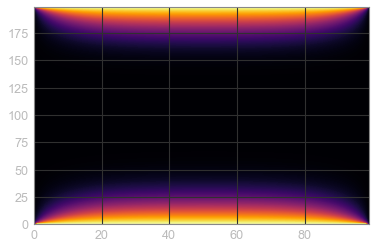

In [15]:
import numpy as np
X, Y = np.mgrid[0:len(b.u0):1, 0:len(b.u0[0]):1]
plt.contourf(X, Y, b.u0, 250, cmap=plt.cm.inferno)

In [ ]:
steady_graph(b)

In [1]:
len(b.u[0])

NameError: name 'b' is not defined

In [ ]:
%%timeit
b.steadystate(T, bc, 0.1, 0.0, 500)

### Warm Handprint on Surface (Cool!)

Check out this video of heat dissipating from a mattress... we're going to produce some results that look strikingly similar. <a href="https://www.youtube.com/watch?v=zsjxxX6voTQ">Video Link</a>

We've set the initial conditions to simulate a 98-degree farenheit human hand on a 63-degree surface. We let it get to a steady state, then remove the hand and watch the warmth fade.

<class 'numpy.ndarray'>


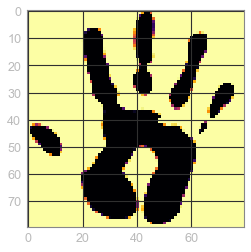

In [2]:
from skimage import io
from skimage.transform import rescale, resize, downscale_local_mean
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()
import numpy as np
%matplotlib inline

image = rescale(rgb2gray(io.imread('hand.png')), 1.0 / 6.0,
                anti_aliasing=False, multichannel=False, mode='constant')

print(type(image))
plt.imshow(image, cmap='inferno')

In [3]:
image.shape

(80, 80)

In [4]:
for i in range(len(image)):
    for j in range(len(image[0])):
        if image[i, j] == 1:
            image[i, j] = 65
        else:
            image[i, j] = 90.7

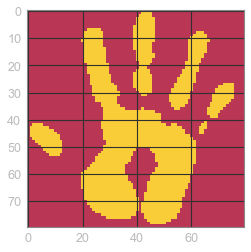

In [5]:
plt.imshow(image, cmap='inferno', vmin=32, vmax = 98.5);

In [6]:
type(image)

numpy.ndarray

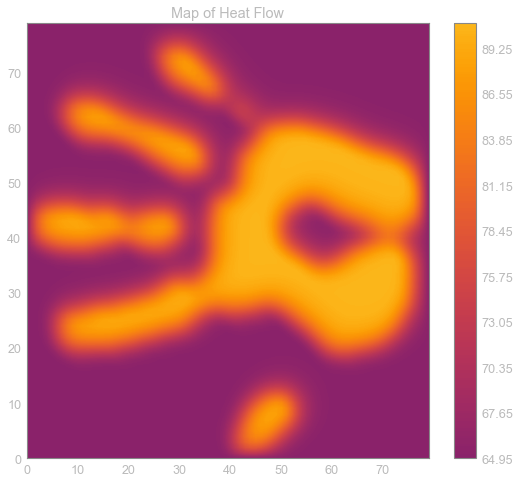

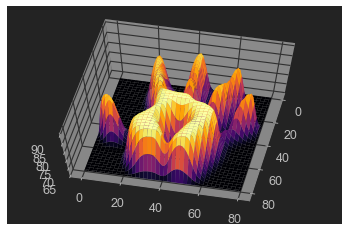

In [17]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Set the number of iterations to use when finding initial steady state
# This means we assume it converges within 550 iterations
maxiter = 5

# Set the number of time steps
nsteps = 501

# Output figures at these timesteps
Tfigs = [0, 4, 25, 50, 100, 250, 500, 1000]
fignum = 0  # Will act as an index for generating figures

# Set dimensions of our plate
w, h = image.shape

# thermal diffusivity, note that this is the same as alpha^2 from the heat flow equation.
D = 4  # Thermal diffusivity of steel, mm2.s-1
# D = 1  # Keep it simple.

# set the cartesian area elements
dx, dy = 1, 1

# SEE: second derivatives of spatially-dependent terms
dx2, dy2 = (dx*dx), (dy*dy)
dt = dx2*dy2 / (2 * D * (dx2 + dy2))

# number of discrete points in each cardinal direction
nx, ny = int(w/dx), int(h/dy)

# Relaxation Method: Initial guess of interior temp
# This is for finding the initial steady state
Tguess = 20

# Initialize the array we'll do calculations on
# and set the interior value to Tguess
u0_ = image.copy()

# Set a meshgrid, analagous to the graph drawn above
# This represents the discrete points across the grid
# We'll use this to plot the solution
X, Y = np.mgrid[0:w:nx*1j, 0:h:ny*1j]


def steady_state_dist(niter, w, h, nx, ny, T):
    for iteration in range(0, niter):
        for i in range(1, nx-1):
            for j in range(1, ny-1):
                T[i, j] = (0.25) * (T[i+1][j] + T[i-1][j] +
                                    T[i][j+1] + T[i][j-1])
    return T


# Find initial steady state and initialize array u
u0 = steady_state_dist(maxiter, w, h, nx, ny, u0_)
u = u0[:]

# Draw a contour plot of steady state distributions
colorinterpolation = 250
colorMap = plt.cm.inferno
plt.figure(figsize=[9, 8])
plt.title("Map of Heat Flow")
plt.contourf(u0.T, colorinterpolation, cmap=colorMap, vmin=44, vmax=100)
plt.colorbar()
plt.grid(False)

plt.show()


#Draw a 3D plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X=X, Y=Y, Z=u0, cmap=colorMap)
ax.view_init(elev=22.5*3, azim=12.25)

In [18]:
def do_timesteps(u0, u):
    # Propagate with forward-difference in time, central-difference in space
    u[1:-1, 1:-1] = u0[1:-1, 1:-1] + D * dt * (
        (u0[2:, 1:-1] - 2*u0[1:-1, 1:-1] + u0[:-2, 1:-1])/dx2
        + (u0[1:-1, 2:] - 2*u0[1:-1, 1:-1] + u0[1:-1, :-2])/dy2)

    u0[:] = u
    return u0, u

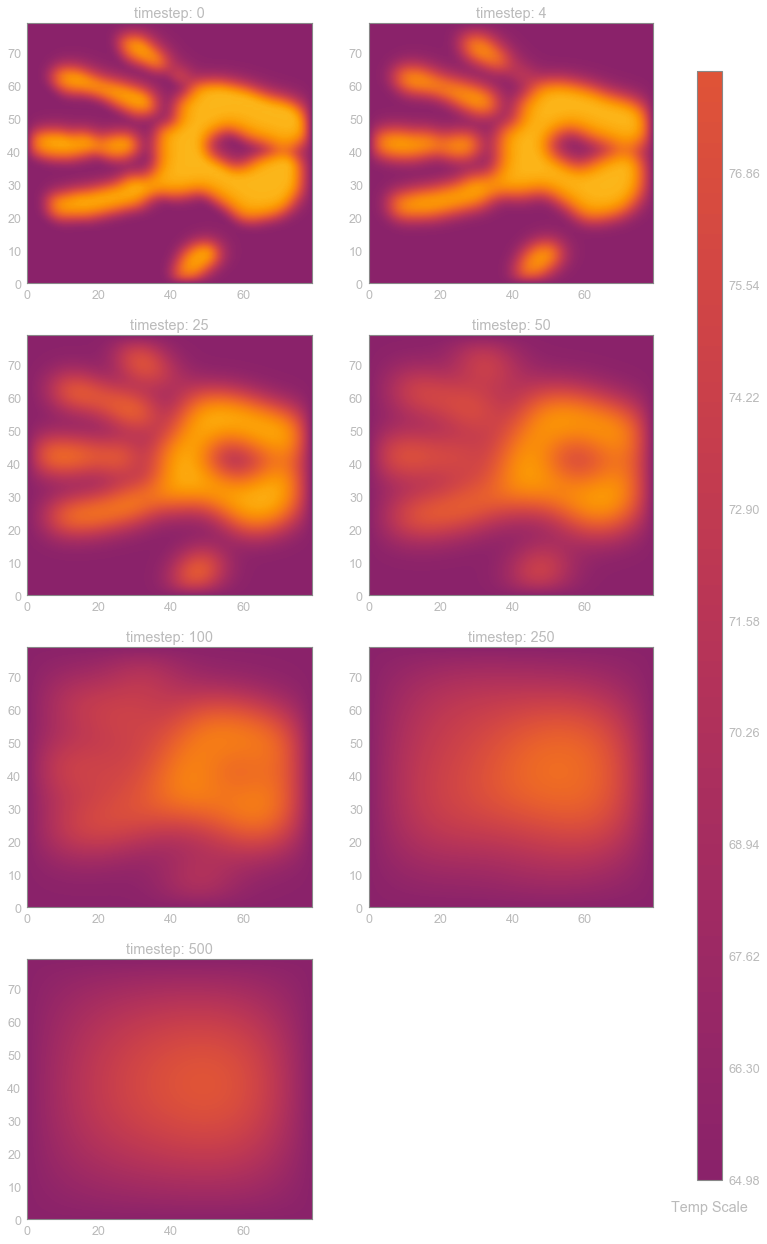

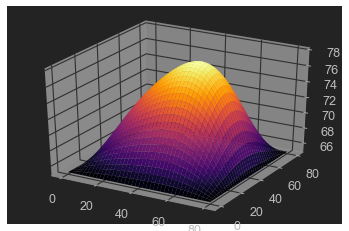

In [19]:
# Run time series and draw heat flow snapshots
fig = plt.figure(figsize=[12, 22])
fignum = 0

for n in range(nsteps):
    u0, u = do_timesteps(u0, u)
    if n in Tfigs:
        fignum += 1
        ax = fig.add_subplot(420 + fignum)
        im = ax.contourf(u.T, colorinterpolation,
                         cmap=colorMap, vmin=44, vmax=100)
        ax.set_title('timestep: {}'.format(n))
        ax.grid(False)

fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
cbar_ax.set_xlabel('Temp Scale', labelpad=20)
fig.colorbar(im, cax=cbar_ax)
plt.show()

#Draw a 3D plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X=X, Y=Y, Z=u0, cmap=colorMap)